In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
print("Full train dataset shape is {}".format(df.shape))

Full train dataset shape is (8693, 14)


In [4]:
df.head(5)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [5]:
df.tail()

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
8688          0.0     6819.0           0.0  1643.0    74.0  Gravior Noxnuther   
8689          0.0        0.0           0.0     0.0     0.0    Kurta Mondalley   
8690          0.0        0.0        1872.0     1.0     0.0       Fayey Connon   
8691          0.0     1049.0           0.0   353.0  3235.0   Celeon Hontichre   
8692        126.0     4688.0           0.0     0.0    12.0   Propsh Hontichre   

      Transported  
8688        False  
8689        False  
8690         True  
8691        False  
8692         True

In [6]:
df.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
df.isnull()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination    Age    VIP  \
0           False       False      False  False        False  False  False   
1           False       False      False  False        False  False  False   
2           False       False      False  False        False  False  False   
3           False       False      False  False        False  False  False   
4           False       False      False  False        False  False  False   
...           ...         ...        ...    ...          ...    ...    ...   
8688        False       False      False  False        False  False  False   
8689        False       False      False  False        False  False  False   
8690        False       False      False  False        False  False  False   
8691        False       False      False  False        False  False  False   
8692        False       False      False  False        False  False  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck   Name  Transported  
0           False      False         False  False   False  False        False  
1           False      False         False  False   False  False        False  
2           False      False         False  False   False  False        False  
3           False      False         False  False   False  False        False  
4           False      False         False  False   False  False        False  
...           ...        ...           ...    ...     ...    ...          ...  
8688        False      False         False  False   False  False        False  
8689        False      False         False  False   False  False        False  
8690        False      False         False  False   False  False        False  
8691        False      False         False  False   False  False        False  
8692        False      False         False  False   False  False        False  

[8693 rows x 14 columns]

In [9]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
df.isnull().sum().sum()

2324

<Axes: xlabel='Transported'>

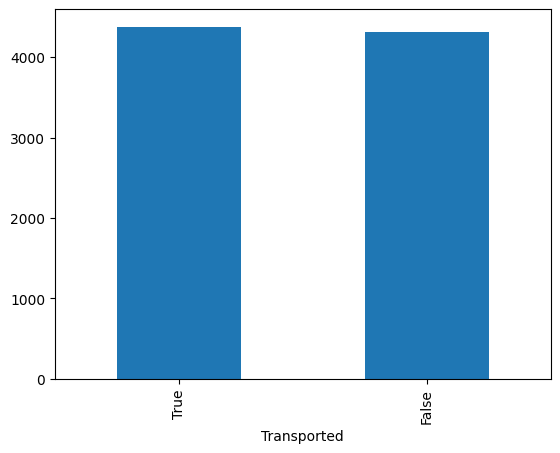

In [11]:
plot_df = df.Transported.value_counts()
plot_df.plot(kind="bar")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

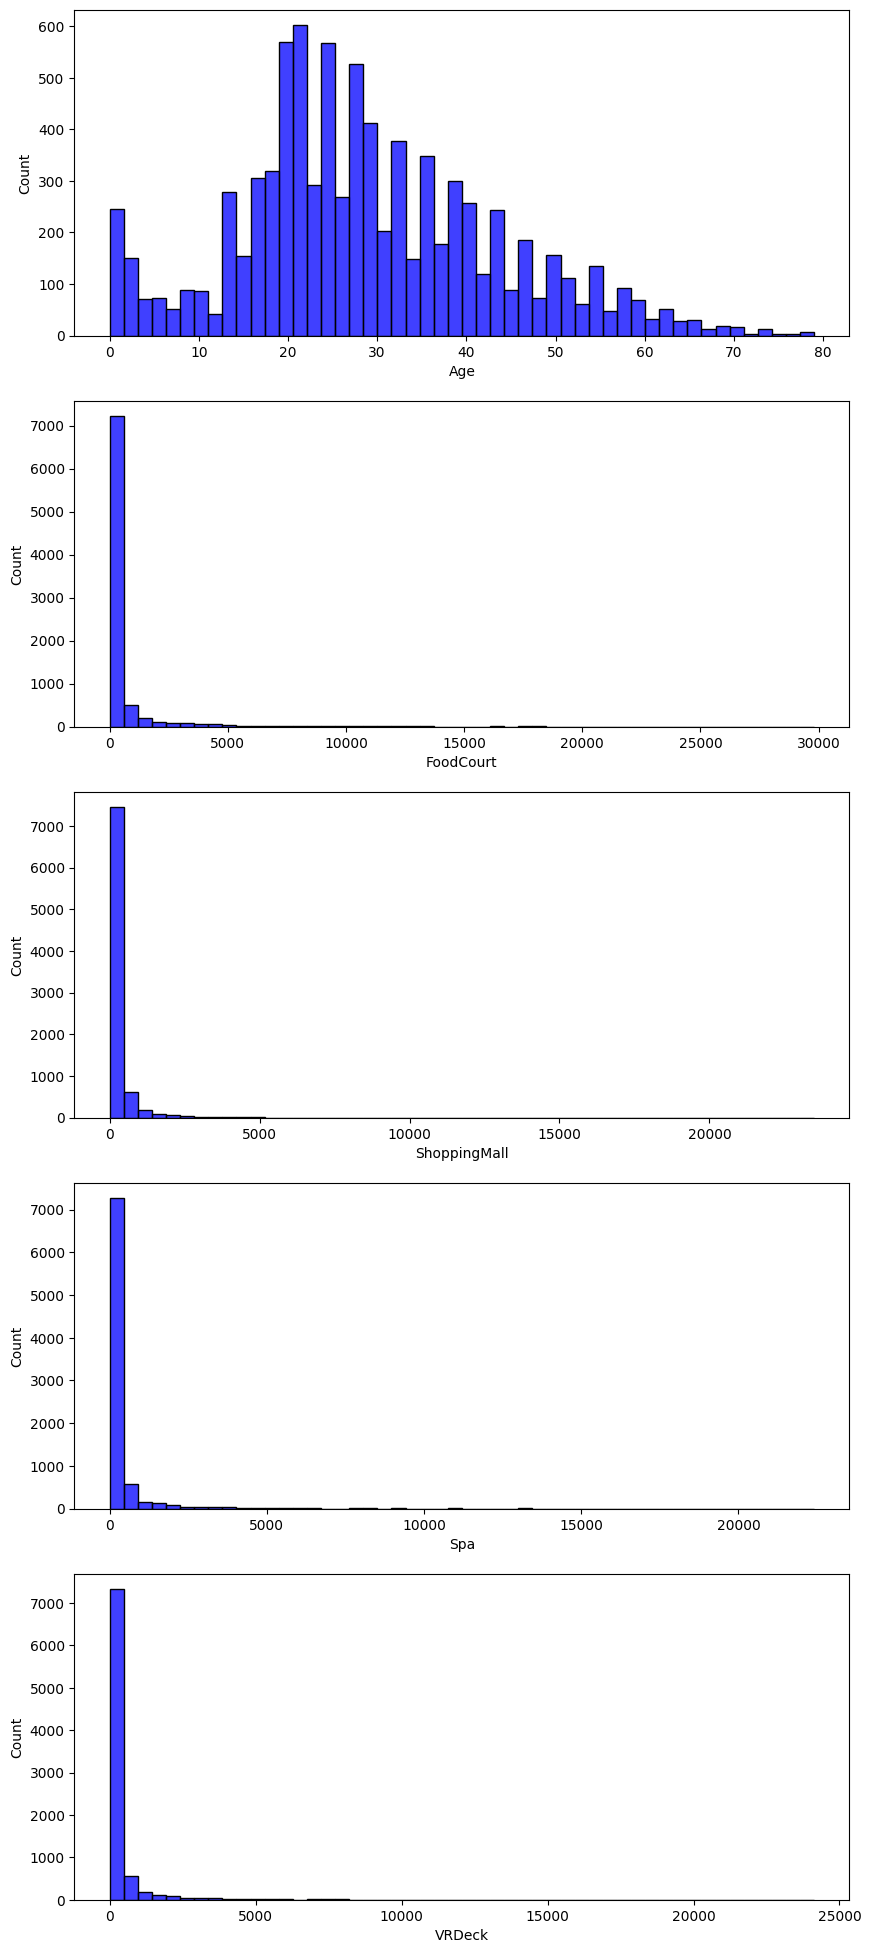

In [12]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(df['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(df['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(df['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(df['VRDeck'], color='b', bins=50, ax=ax[4]);

In [13]:
df = df.drop(['PassengerId', 'Name'], axis=1)
df.head(5)

HomePlanet CryoSleep  Cabin  Destination   Age    VIP  RoomService  \
0     Europa     False  B/0/P  TRAPPIST-1e  39.0  False          0.0   
1      Earth     False  F/0/S  TRAPPIST-1e  24.0  False        109.0   
2     Europa     False  A/0/S  TRAPPIST-1e  58.0   True         43.0   
3     Europa     False  A/0/S  TRAPPIST-1e  33.0  False          0.0   
4      Earth     False  F/1/S  TRAPPIST-1e  16.0  False        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0        0.0           0.0     0.0     0.0        False  
1        9.0          25.0   549.0    44.0         True  
2     3576.0           0.0  6715.0    49.0        False  
3     1283.0         371.0  3329.0   193.0        False  
4       70.0         151.0   565.0     2.0         True

In [14]:
df.isnull().sum().sort_values(ascending=True)

Transported       0
Age             179
RoomService     181
Destination     182
FoodCourt       183
Spa             183
VRDeck          188
Cabin           199
HomePlanet      201
VIP             203
ShoppingMall    208
CryoSleep       217
dtype: int64

In [15]:
label = "Transported"
df[label] = df[label].astype(int)

In [16]:
df['VIP'] = df['VIP'].fillna(0).astype(int)
df['CryoSleep'] = df['CryoSleep'].fillna(0).astype(int)


In [17]:
try:
    df = df.drop('Cabin', axis=1)
except KeyError:
    print("Field does not exist")

In [18]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6978 examples in training, 1715 examples in testing.


In [19]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [20]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [21]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"])

Use /tmp/tmps0jn88ex as temporary training directory


In [22]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:04.747817. Found 6978 examples.
Training model...
Model trained in 0:00:03.552228
Compiling model...
Model compiled.


In [23]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

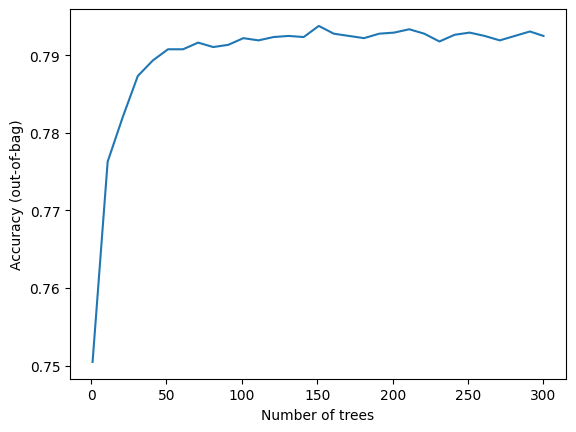

In [24]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [25]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6978, accuracy=0.7924906850100315, loss=0.9374355762998349, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [26]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 0s 33ms/step - loss: 0.0000e+00 - accuracy: 0.7755
loss: 0.0000
accuracy: 0.7755


In [27]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH
	 SUM_SCORE
	 NUM_AS_ROOT


In [28]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #1), 141.0),
 ("RoomService" (1; #5), 67.0),
 ("Spa" (1; #7), 65.0),
 ("VRDeck" (1; #9), 16.0),
 ("ShoppingMall" (1; #6), 10.0),
 ("FoodCourt" (1; #3), 1.0)]

In [29]:
import pandas as pd
import tensorflow_decision_forests as tfdf

# Load the correct dataset
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')  
submission_id = test_df['PassengerId']

# Replace NaN values with zero for specific boolean columns
test_df[['VIP', 'CryoSleep']] = test_df[['VIP', 'CryoSleep']].fillna(0)

# Ensure Cabin column exists and handle NaN values before splitting
test_df['Cabin'] = test_df['Cabin'].fillna('Unknown/0/Unknown')  # Fill missing Cabin values

# Splitting Cabin into Deck, Cabin_num, and Side
test_df[['Deck', 'Cabin_num', 'Side']] = test_df['Cabin'].str.split("/", expand=True)

# Drop the original 'Cabin' column
test_df = test_df.drop('Cabin', axis=1)

# Convert categorical boolean to numerical values
test_df['VIP'] = test_df['VIP'].astype(int)
test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)

# Fill missing values for categorical columns using mode
for col in ['HomePlanet', 'Destination', 'Deck', 'Side']:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

# Convert Pandas DataFrame to TensorFlow dataset
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df)

# Load trained model (Ensure 'rf' model is loaded before prediction)
rf = tfdf.keras.RandomForestModel()  # Load your trained model here if not already loaded
predictions = rf.predict(test_ds)
n_predictions = (predictions > 0.5).astype(bool)

# Load sample submission
sample_submission_df = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

# Ensure predictions match the sample submission length
n_predictions = n_predictions[:len(sample_submission_df)]

# Create output DataFrame
output = pd.DataFrame({'PassengerId': submission_id, 'Transported': n_predictions.squeeze()})

# Save submission file
output.to_csv('/kaggle/working/submission.csv', index=False)

# Debugging prints
print(len(n_predictions))  
print(len(sample_submission_df))  
output.head()


Use /tmp/tmp_cqq3a1r as temporary training directory
1/5 [=====>........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


5/5 [==============================] - 0s 6ms/step
4277
4277


PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01        False
3     0021_01        False
4     0023_01        False

In [30]:
n_predictions = n_predictions[:len(sample_submission_df)]

In [31]:
sample_submission_df = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01        False
3     0021_01        False
4     0023_01        False